# 画图

In [2]:
import sys
sys.path.append("..")

from torch.utils.data import DataLoader
from enformer_pytorch import Enformer, from_pretrained

from MPRA_predict.utils import *
from MPRA_predict.datasets import *

np.set_printoptions(linewidth=120)

In [5]:
a = np.load('data/enformer_tfr_sequences_test.npy')
a

array(['TATTTTTTTAAGTTGCCATTTGCTTGATGCTTAAGACCAAATGAAATCACCACAAATAGAATTCATGGAAGGAAGGGCCATCACCGTTTATAGCTTGATTTAAAGTTTTCATGTCTTTCTTCAGAAATTGGTCATGGTTACATCTCATCAGAGCTGCAGCCAGCTGCCCGCTCCTAAGTTGTGCTGCTTATGATGTGGGTGCAGGCAATGACGTCCACTTGACAAAGCTTCTGAATCAGCCATGTCTGGGGAGCAAGAGAACTTGGCACCATTGGTCTTTGGCATGGGCACACATCTGCCTGTGGTGTCCCCATCATGACTTTTTTCAGTAAGGACTCACGCAACAGTAATCAGTGACAGCAGTTCTCAAACCTGGAGAGCAGAAGTGCACAGACTGGTCCCAGATATATTTCCCTGGTCACTTCTTCACTCCTCCAGGCCACTTCTGCCCCACCTTCTGAGCAGAAGCTGCTAAAAAGACAGGATGGACACTCGTTCTGAAGGTGTTTCTCAGCATACGGCAAGCCCTTTGATAGGCAGTAGAGAACTTTGAGCACTTGGCAGGGTCATTTTCTGATTCTTTTTCTTTCTTTCTGTAGCCATTAACATCTGGTAATTTTTGGATTCTCTTTTGCTTCATCCTCATTTGTGGCCTGGACTATGATAAGCAGACACAAGCTAGTAGGACCCATGTACTCCTTCAACATCAAGGAGACCTTCAACATCAAGGTCAAGAGACCTTGAAAAACACCTGCAGCTTTTGCTGCCTGTAAAACAGCATCCAGTGCTTCATAATATAGCCCTAGTTTATCTTCTAATTATATCTTGCCCGTCAATTGACAAACATCAATTGGTGCCTTTTGTGGACACATTCATGATCTCCCTTCCCCAAATATAGGGAACAAGTTTTTTACTTTTTTATTTTCCCCCACCTACACTCCACAGCGCAGAGCACTTACCAGGAAATTATTTAAAGTTCTCAAACAGGGTCT

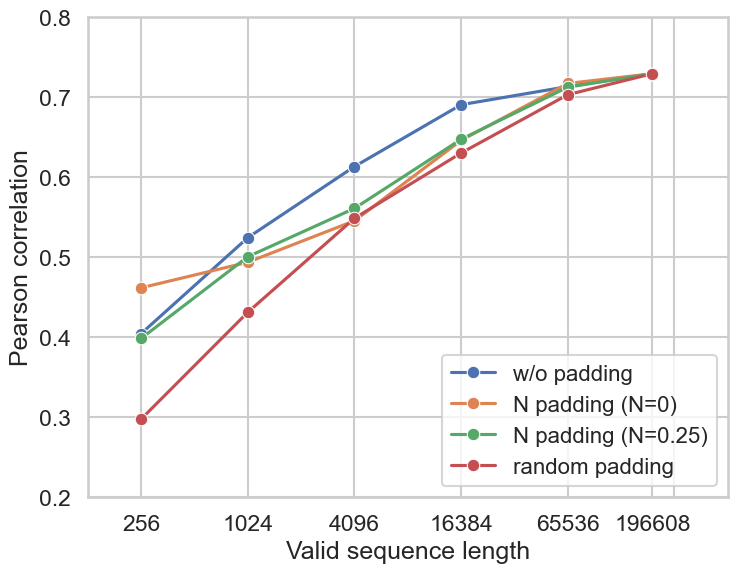

In [2]:
plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.13, bottom=0.13, right=0.93, top=0.93)


pred_list = []
for cropped_length in [256, 1024, 4096, 16384, 65536, 196608]:
    pred = np.load(f'data/Enformer_pred_crop_{cropped_length}.npy')
    pred_list.append(pred)
target = np.load('data/enformer_targets_test_100_2.npy')
pred_list.append(target)
pred_list = np.stack(pred_list)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
sns.lineplot(x=[8, 10, 12, 14, 16, 16+np.log2(3)], y=corr[-1, :-1], marker="o", label='w/o padding')





pred_list = []
for cropped_length in [256, 1024, 4096, 16384, 65536, 196608]:
    pred = np.load(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_N.npy')
    pred_list.append(pred)
target = np.load('data/enformer_targets_test_100_2.npy')
pred_list.append(target)
pred_list = np.stack(pred_list)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
sns.lineplot(x=[8, 10, 12, 14, 16, 16+np.log2(3)], y=corr[-1, :-1], marker="o", label='N padding (N=0)')







pred_list = []
for cropped_length in [256, 1024, 4096, 16384, 65536, 196608]:
    pred = np.load(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_N_0.25.npy')
    pred_list.append(pred)
target = np.load('data/enformer_targets_test_100_2.npy')
pred_list.append(target)
pred_list = np.stack(pred_list)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
sns.lineplot(x=[8, 10, 12, 14, 16, 16+np.log2(3)], y=corr[-1, :-1], marker="o", label='N padding (N=0.25)')








pred_list = []
for cropped_length in [256, 1024, 4096, 16384, 65536, 196608]:
    pred = np.load(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_random_0.npy')
    pred_list.append(pred)
pred_list = np.stack(pred_list)

target = np.load('data/enformer_targets_test_100_2.npy')
pred_list = np.concatenate([pred_list, target[None, :]], axis=0)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
sns.lineplot(x=[8, 10, 12, 14, 16, 16+np.log2(3)], y=corr[-1, :-1], marker="o", label='random padding')





plt.xlim(7, 19)
plt.ylim(0.2, 0.8)
plt.xticks([8, 10, 12, 14, 16, 16+np.log2(3), 18], labels=[256, 1024, 4096, 16384, 65536, 196608, ''])
plt.yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
plt.xlabel('Valid sequence length')
plt.ylabel('Pearson correlation')
plt.legend(fontsize=16, loc='lower right')
plt.savefig('figures/correlation_between_3_padding_methods.png', dpi=400)
plt.savefig('figures/correlation_between_3_padding_methods.pdf', dpi=400)
plt.show()

(7, 10, 100, 2, 5313)
(70, 100, 2, 5313)
(100, 2, 5313)


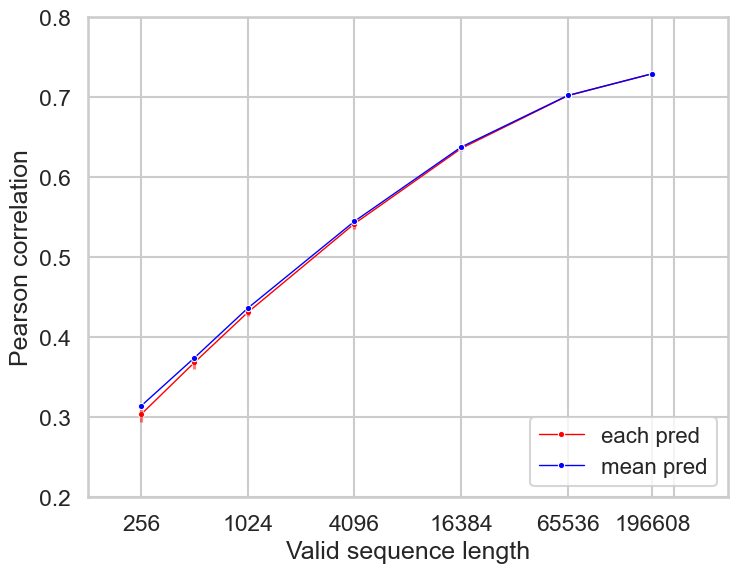

In [19]:
plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.13, bottom=0.13, right=0.93, top=0.93)


shape = [7,10,100,2,5313]


pred_array = []
for cropped_length in [256, 512, 1024, 4096, 16384, 65536, 196608]:
    pred_list = np.load(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_random_10_times.npy')
    pred_array.append(pred_list)
pred_array = np.stack(pred_array)
print(pred_array.shape)


pred_list = pred_array.reshape(pred_array.shape[0]*pred_array.shape[1], 100, 2, 5313)
print(pred_list.shape)
target = np.load('data/enformer_targets_test_100_2.npy')
print(target.shape)
pred_list = np.concatenate([pred_list, target[None, :]], axis=0)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
corr_array = corr[-1, :-1].reshape(pred_array.shape[0], pred_array.shape[1])


x_labels = [x for x in [256, 512, 1024, 4096, 16384, 65536, 196608] for _ in range(10)]
# plt.boxplot(corr_array.T, positions=[8,10,12,14,16,16+np.log2(3)], widths=0.5)

sns.lineplot(x=[8,9,10,12,14,16,16+np.log2(3)], y=corr_array.mean(-1),
             linewidth=1, marker=".", label='each pred', color='red',)

plt.errorbar(x=[8,9,10,12,14,16,16+np.log2(3)], y=corr_array.mean(-1), yerr=corr_array.std(-1),
             fmt='none', color='red', alpha=0.5)


pred_mean_list = pred_array.mean(axis=1) # shape = (6, 100, 2, 5313)
pred_mean_list = np.concatenate([pred_mean_list, target[None, :]], axis=0)
corr = np.corrcoef(pred_mean_list.reshape(pred_mean_list.shape[0], -1))
sns.lineplot(x=[8,9,10,12,14,16,16+np.log2(3)], y=corr[-1, :-1], linewidth=1, marker=".", label='mean pred', color='blue')



plt.xlim(7, 19)
plt.ylim(0.2, 0.8)
plt.xticks([8, 10, 12, 14, 16, 16+np.log2(3), 18], labels=[256, 1024, 4096, 16384, 65536, 196608, ''])
plt.yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
plt.xlabel('Valid sequence length')
plt.ylabel('Pearson correlation')
plt.legend(fontsize=16, loc='lower right')
plt.savefig('figures/correlation_random_mean.png', dpi=400)
plt.show()